# Desarrollo Prueba DataSet Titanic

# Análisis Datos de Titanic

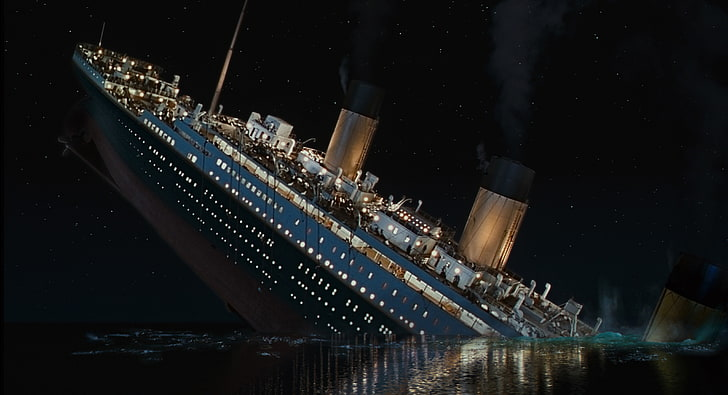

In [1]:
from IPython.display import Image
Image(filename="D:/Prueba/titanic.jpg")

### Importamos librerias

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Carga de datos a través de la función read_csv

In [3]:
filepath="D:/Prueba"
data_train = pd.read_csv(filepath+"/TitanicTrain.csv")
data_test = pd.read_csv(filepath+"/TitanicTest.csv")

#### Revisamos que se cargo el dataset

In [24]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Analizaremos información que nos aporta el dataset en dimension y estructuras

##### Nombre de las columnas en forma de array

In [26]:
data_train.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [27]:
data_train.head() # Por medio de este comando veo las primeras 5 filas del dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
data_train.tail() # Por medio de este comando veo las 5 ultimas filas del dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
data_train.shape #Veo las dimensiones

(891, 12)

In [30]:
data_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [31]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [33]:
data_test.shape

(418, 11)

* **Las dimensiones del  Dataset train son una cantidad de 12 columnas y 891 filas**
* **Las dimensiones del Dataset test son una cantidad de 11 columnas y 418 filas**

## Resumen estadísticos básicos de las variables numericas

In [34]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Tipos de variables que contiene el dataset

In [35]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Datos Faltantes

A simple vista podemos darnos cuenta que hay valores faltantes por medio del metodo describe vemos en la cuenta y sospechamos que en Age hay valores faltantes ya que tiene un valor de 714 y como comprobamos por medio del comando shape tenemos 891 filas. **De todas maneras debemos comprobar esto**

In [36]:
pd.isnull(data_train["Age"])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [37]:
pd.isnull(data_train["Age"]).ravel().sum()

177

##### Por otro lado, la tecnica utilizada para ver si tenemos datos nulos con el describe sirve solo para variables numericas, podemos comprobar columna por columna en las varibles categoricas

In [38]:
pd.isnull(data_train["Name"]).ravel().sum()

0

In [39]:
pd.isnull(data_train["Sex"]).ravel().sum()

0

In [40]:
pd.isnull(data_train["Ticket"]).ravel().sum()

0

In [41]:
pd.isnull(data_train["Cabin"]).ravel().sum()  #Datos nulos de Cabin

687

In [42]:
pd.isnull(data_train["Embarked"]).ravel().sum() #Datos nulos de embarked

2

**Descubrimos que tenemos datos nulos en la columna Cabin y Embarked respectivamente,En otro modo, puedo hacer un is null de todo el dataset para verificar lo que hemos propuesto**

In [43]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**data_test tiene 86 valores nulos en Age y en Cabin 327 y un dato nulo en Fare**

##### Vemos que coincide la cantidad de nulos encontrados con los metodos que propusimos, Ahora los valores faltantes generalmente son por dos razones
* Extracción de los datos
* Recolección de los datos

## Continuamos Analizando la Data

**Concatenamos los Dataset para fines de analisis previo**

In [45]:
data_total = pd.concat([data_train, data_test])

In [46]:
data_total.shape

(1309, 12)

## Gráficos 

**Los graficos nos permiten hacernos de una idea de como se distribuyen los datos y analizar de manera visual**

Text(0.5, 1.0, 'Cantidad de Pasajeros sobrevivientes')

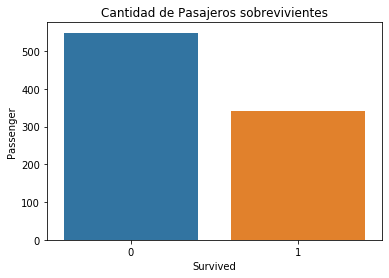

In [72]:
sns.countplot(x="Survived", data=data_train)
plt.ylabel("Passenger")
plt.xlabel("Survived")
plt.title("Cantidad de Pasajeros sobrevivientes")

**Este gráfico nos muestra que la cantidad de sobrevivientes es menor a la cantidad de fallecidos** 

Text(0.5, 0, 'Survived')

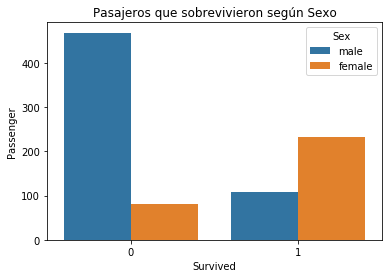

In [75]:
sns.countplot(x="Survived", hue="Sex", data=data_train)
plt.title("Pasajeros que sobrevivieron según Sexo")
plt.ylabel("Passenger")
plt.xlabel("Survived")

**Este gráfico nos muestra que el sexo femenino logro salvarse mas que el sexo masculino**

Text(0, 0.5, 'Passanger')

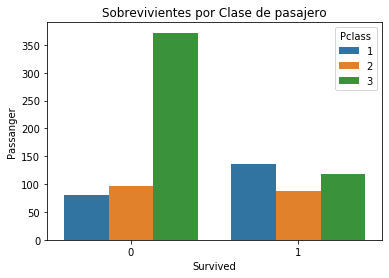

In [78]:
sns.countplot(x="Survived", hue="Pclass", data=data_train)
plt.title("Sobrevivientes por Clase de pasajero")
plt.xlabel("Survived")
plt.ylabel("Passanger")

**Este grafico nos muestra por clase la cantidad de sobrevivientes y fallecidos vemos que la 3era clase tuvo la mayor cantidad de fallecidos y que la clase que mas sobrevivio fue la 1era**

Text(0, 0.5, 'Cantidad de pasajeros')

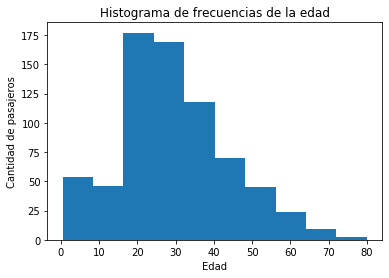

In [87]:
plt.hist(data_train["Age"])
plt.title("Histograma de frecuencias de la edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pasajeros")

**Este gráfico nos muestra como se distribuyen las edades de los pasajeros podemos notar que entre los 20 y los 30 se concentran mayormente**

Text(0.5, 1.0, 'Boxplot de los sobrevivientes por edad')

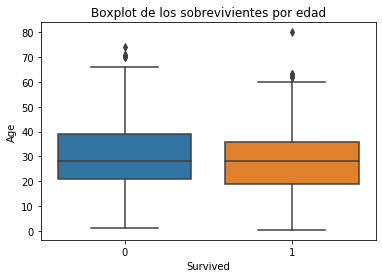

In [91]:
sns.boxplot(x="Survived",y="Age", data=data_train)
plt.ylabel("Age")
plt.xlabel("Survived")
plt.title("Boxplot de los sobrevivientes por edad")

**El grafico de cajas nos muestra que las personas entre los 20  y los 40 tuvieron mejores chances de salvarse que las personas mayores**

Text(0, 0.5, 'Cantidad de pasajeros')

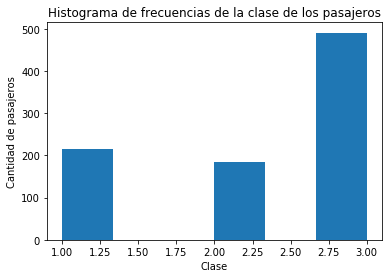

In [102]:
plt.hist(data_train["Pclass"],bins=6)
plt.title("Histograma de frecuencias de la clase de los pasajeros")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")

**Vemos como se distribuyen los pasajeros según la clase en que viajan**

Text(0.5, 0, 'Clase')

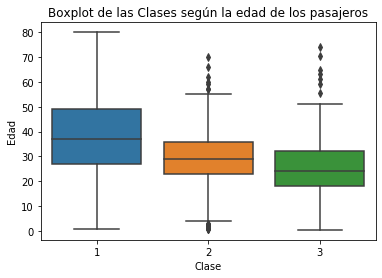

In [104]:
sns.boxplot(x="Pclass", y="Age", data=data_train)
plt.title("Boxplot de las Clases según la edad de los pasajeros")
plt.ylabel("Edad")
plt.xlabel("Clase")

**Mediante este boxplot podemos ver los cuartiles de las personas que viajaban en cada clase**

Text(0.5, 1.0, 'Gráfico circular de sobrevivientes')

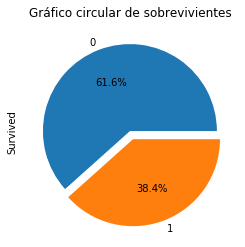

In [118]:
data_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title("Gráfico circular de sobrevivientes")

## Limpieza de los datos

**Como vimos en la seccion anterior donde analizamos los datos faltantes nos damos cuenta que la columna Cabin contiene una alta cantidad de datos nulos expecificamente 687 de 891 un 77% de los datos lo que afectara en los resultados, por otro lado tenemos los datos nulos de Age debemos tratarlos**

In [121]:
# Para estos efectos determinamos que la columna Cabin no nos sera útil
data_train.drop("Cabin", axis=1, inplace=True)
data_test.drop("Cabin", axis=1, inplace=True)

In [124]:
# Verificamos si se elimino la columna en train
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [125]:
# Verificamos si se elimino la columa en test
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [126]:
# La columna ticket no nos sera útil
data_train.drop(['Ticket'], axis = 1, inplace = True)
data_test.drop(['Ticket'], axis = 1, inplace = True)

In [129]:
data_train['Age'].fillna((data_train['Age'].mean()), inplace=True)
data_test['Age'].fillna((data_test['Age'].mean()), inplace=True)
data_test['Fare'].fillna((data_test['Fare'].mean()), inplace=True)

In [131]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [132]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [135]:
data_train = data_train.drop(['Name'],axis=1)
data_train['family'] = data_train['SibSp'] + data_train['Parch']
data_train = data_train.drop(['SibSp', 'Parch'],axis=1)
data_test = data_test.drop(['Name'],axis=1)
data_test['family'] = data_test['SibSp'] + data_test['Parch']
data_test = data_test.drop(['SibSp', 'Parch'],axis=1)

In [139]:
#Debemos tratar las variables Categoricas
data_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [140]:
data_test.Pclass.unique()

array([3, 2, 1], dtype=int64)

## Crearemos Variables Dummy eliminando las redundantes

In [145]:
dummy_sex = pd.get_dummies(data_train["Sex"],prefix="Sex").iloc[:,1:]
dummy_sex.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [146]:
dummy_embarked = pd.get_dummies(data_train["Embarked"],prefix="Embarked").iloc[:,1:]
dummy_embarked.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [147]:
dummy_sex_t = pd.get_dummies(data_test["Sex"],prefix="Sex").iloc[:,1:]
dummy_embarked_t = pd.get_dummies(data_test["Embarked"],prefix="Embarked").iloc[:,1:]


### Concatenaremos las variables dummy a los Dataset

In [149]:
data_train=pd.concat([data_train,dummy_sex,dummy_embarked],axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,7.2500,S,1,1,0,1
1,2,1,1,female,38.0,71.2833,C,1,0,0,0
2,3,1,3,female,26.0,7.9250,S,0,0,0,1
3,4,1,1,female,35.0,53.1000,S,1,0,0,1
4,5,0,3,male,35.0,8.0500,S,0,1,0,1


In [150]:
data_test=pd.concat([data_test,dummy_sex_t,dummy_embarked_t],axis=1)
data_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
0,892,3,male,34.5,7.8292,Q,0,1,1,0
1,893,3,female,47.0,7.0000,S,1,0,0,1
2,894,2,male,62.0,9.6875,Q,0,1,1,0
3,895,3,male,27.0,8.6625,S,0,1,0,1
4,896,3,female,22.0,12.2875,S,2,0,0,1


### Eliminamos las columnas 

In [151]:
data_train.drop(['Sex'], axis = 1, inplace = True)
data_test.drop(['Sex'], axis = 1, inplace = True)

In [152]:
data_train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,S,1,1,0,1
1,2,1,1,38.0,71.2833,C,1,0,0,0
2,3,1,3,26.0,7.9250,S,0,0,0,1
3,4,1,1,35.0,53.1000,S,1,0,0,1
4,5,0,3,35.0,8.0500,S,0,1,0,1


In [153]:
data_test.head()

,PassengerId,Pclass,Age,Fare,Embarked,family,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,Q,0,1,1,0
1,893,3,47.0,7.0000,S,1,0,0,1
2,894,2,62.0,9.6875,Q,0,1,1,0
3,895,3,27.0,8.6625,S,0,1,0,1
4,896,3,22.0,12.2875,S,2,0,0,1


In [154]:
data_train.drop(['Embarked'], axis = 1, inplace = True)
data_test.drop(['Embarked'], axis = 1, inplace = True)

In [155]:
data_train.head()

,PassengerId,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,1,1,0,1
1,2,1,1,38.0,71.2833,1,0,0,0
2,3,1,3,26.0,7.9250,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,1


In [156]:
data_test.head()

,PassengerId,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,0,1,1,0
1,893,3,47.0,7.0000,1,0,0,1
2,894,2,62.0,9.6875,0,1,1,0
3,895,3,27.0,8.6625,0,1,0,1
4,896,3,22.0,12.2875,2,0,0,1


## Revisamos los dataset resultantes de la limpieza

In [157]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   family       891 non-null    int64  
 6   Sex_male     891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [158]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   family       418 non-null    int64  
 5   Sex_male     418 non-null    uint8  
 6   Embarked_Q   418 non-null    uint8  
 7   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


## Matriz de Correlación de Pearson

In [159]:
correlation_matrix=data_train.corr()

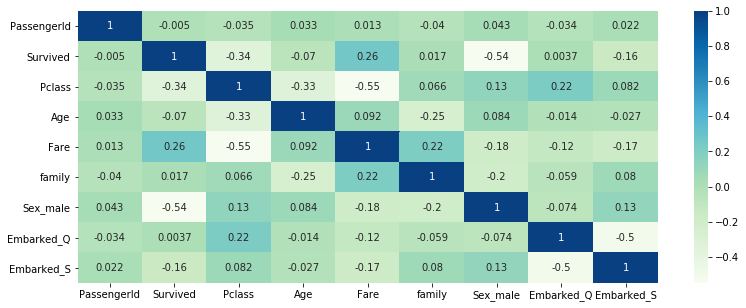

In [160]:
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=correlation_matrix, annot=True, cmap='GnBu')
plt.show()

(7, 0)

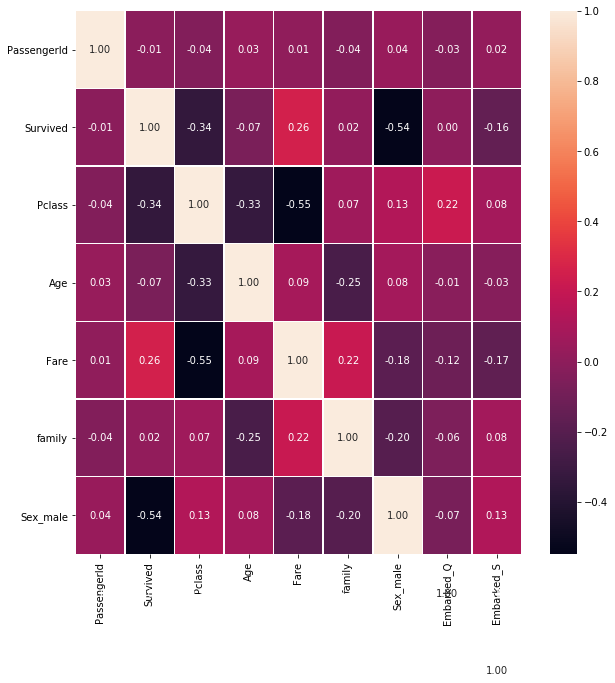

In [162]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

## Creamos la Rutina de Limpieza

In [4]:
def limpieza(datos):
    #borramos variables que no usaremos
    datos.drop(["Cabin"], axis=1, inplace=True)
    datos.drop(['Ticket'], axis = 1, inplace = True)
    # Remplazamos los valores nulos
    datos['Age'].fillna((datos['Age'].mean()), inplace=True)
    datos['Fare'].fillna((datos['Fare'].mean()), inplace=True)
    # borramos variable name 
    datos = datos.drop(['Name'],axis=1)
    datos['family'] = datos['SibSp'] + datos['Parch']
    datos = datos.drop(['SibSp', 'Parch'],axis=1)
    # Creamos variables dummy sin redundancia
    dummy_sex_t = pd.get_dummies(datos["Sex"],prefix="Sex").iloc[:,1:]
    dummy_embarked_t = pd.get_dummies(datos["Embarked"],prefix="Embarked").iloc[:,1:]
    #Concatenamos las varaibles dummy
    datos=pd.concat([datos,dummy_sex_t,dummy_embarked_t],axis=1)
    #Borramos
    datos.drop(['Sex'], axis = 1, inplace = True)
    datos.drop(['Embarked'], axis = 1, inplace = True)   
    return datos      


In [5]:
data_train=limpieza(data_train)

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,1,1,0,1
1,2,1,1,38.0,71.2833,1,0,0,0
2,3,1,3,26.0,7.9250,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,1


In [6]:
data_test=limpieza(data_test)

In [7]:
data_test.head()

,PassengerId,Pclass,Age,Fare,family,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,0,1,1,0
1,893,3,47.0,7.0000,1,0,0,1
2,894,2,62.0,9.6875,0,1,1,0
3,895,3,27.0,8.6625,0,1,0,1
4,896,3,22.0,12.2875,2,0,0,1


## Modelos de Aprendizaje

## Selección de Variables

In [7]:
cols=["PassengerId","Pclass","Age","Fare","family","Sex_male","Embarked_Q","Embarked_S"]

In [8]:
X = data_train[cols] # Array de data_train sin survived
Y = np.array(data_train["Survived"]) #Array de los resultados de survived

### Modelo de Regresión Logistica  con stasmodel.api

In [11]:
import statsmodels.api as sm

In [26]:
logit_model = sm.Logit(Y,X)

In [27]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.491228
         Iterations 6


In [28]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.262     
Dependent Variable: y                AIC:              891.3676  
Date:               2020-06-10 15:36 BIC:              929.7064  
No. Observations:   891              Log-Likelihood:   -437.68   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      2.3470e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
PassengerId   0.0010    0.0003    3.0203  0.0025   0.0003   0.0016
Pclass       -0.0466    0.0906   -0.5141  0.6072  -0.2242   0.1310
Age           0.0010    0.0059    0.1753  0.8609  -0.0105   0.0126
Fare          0.0171    0.0030    5.7486  0.0000   0.0113   0.0229
family       -0.2186    0.0642   -3.4054  0.0007  -0.3444  -0.0928
Sex_male     -2.3566    0.1835  -12.8419  0.0000  -2.7163  -1.9969
Embarked_Q    0.2530    0.3547    0.7132  0.4757  -0.4422   0.9482
Embarked_S    0.2064    0.2200    0.9383  0.3481  -0.2248   0.6376
=================================================================

"""

### Esta libreria nos permite hacer un summary donde podemos ver los datos estadisticos 
* Fecha de creacion del modelo por que evidentemente podemos mejorar cualquier modelo
*  vemos el numero de observaciones que son 891
* Grados de libertad del modelo que en este caso son 7
* numero de residuos que son 883
* convergensia entrega 1 o 0 entonces vemos que el modelo converge
* numero de iteraciones 
* el Factor de R2 y distintos parametros como el logaritmo del entorno 
Lo importante que nos interesa son las variables que metimos a predecir con sus coeficientes, error Std y su Z valor y P valor
el p valor es el contraste de hipotesis si sera nulo o no esto se detalla en el estadistico de Wald pero en particular si el p valor es menor esa variable significa mas en el modelo 

## Probaremos los algoritmos, Separamos los datos en entrenamiento y Prueba

**Para dividir un Dataset podemos usar la herramienta train_test_split**

In [9]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2)

## Implementación del modelo con Scikit-learn

**En particular combinar estas librerias nos ayudara a entender de mejor manera los valores estadisticos de nuestros modelos ya que la libreria Scikit-learn es mucho mas potente**

In [12]:
from sklearn import linear_model

**Utilizamos la Logistic Regression para nuestros datos y los entrenamos con Fit**

In [32]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train,Y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Podemos pedirle al modelo que nos entregue el factor de R2 con el comando score**

In [33]:
logit_model.score(X_train,Y_train)

0.7752808988764045

**Vemos que el promedio de las y nos entrega el porcentaje de personas que se salvaron el contrario es 61% asi que el modelo eleva la eficacia**

In [35]:
1-Y.mean()

0.6161616161616161

In [36]:
print(f"Presisión de la prediccion %.2f"%(logit_model.score(X_train,Y_train)*100),"%")

Presisión de la prediccion 77.53 %


## Validación del modelo logístico

In [39]:
probs = logit_model.predict_proba(X_test)

In [40]:
probs

array([[3.92157406e-01, 6.07842594e-01],
       [6.18576577e-01, 3.81423423e-01],
       [9.11455103e-01, 8.85448973e-02],
       [8.93680002e-01, 1.06319998e-01],
       [7.94948684e-01, 2.05051316e-01],
       [2.90817706e-01, 7.09182294e-01],
       [7.84570539e-01, 2.15429461e-01],
       [3.65988653e-01, 6.34011347e-01],
       [3.81600657e-01, 6.18399343e-01],
       [8.53295596e-01, 1.46704404e-01],
       [7.86056650e-01, 2.13943350e-01],
       [6.91841498e-01, 3.08158502e-01],
       [8.96402539e-01, 1.03597461e-01],
       [7.20258826e-01, 2.79741174e-01],
       [8.25224782e-01, 1.74775218e-01],
       [6.30844513e-01, 3.69155487e-01],
       [1.14712737e-01, 8.85287263e-01],
       [8.95388865e-01, 1.04611135e-01],
       [8.13042822e-01, 1.86957178e-01],
       [8.51165677e-01, 1.48834323e-01],
       [9.22494259e-01, 7.75057407e-02],
       [7.31027768e-01, 2.68972232e-01],
       [8.02504929e-02, 9.19749507e-01],
       [8.07341185e-01, 1.92658815e-01],
       [3.889646

**Por defecto cuando una probabilidad es superior a 0.5 se cataloga como 1**

In [41]:
prediction = logit_model.predict(X_test) # x_test por que es el que estamos validando

In [42]:
prediction

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [53]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"]= np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.607843,1
1,0.381423,0
2,0.088545,0
3,0.106320,0
4,0.205051,0


In [50]:
pd.crosstab(prob_df.prediction,columns="count")

col_0,count
prediction,
0,131
1,48


In [75]:
from sklearn import metrics

In [76]:
metrics.accuracy_score(Y_test,prediction) # 82%

0.8212290502793296

## Validación Cruzada

**Se lleva a cabo cuando queremos hacer una prediccion para comprobar como de bien el modelo es capaz de generalizar los resultados, se requiere que el modelo predictivo no tenga problemas de overfitting**

In [54]:
from sklearn.model_selection import cross_val_score

In [83]:
scores = cross_val_score(linear_model.LogisticRegression(), X,Y,scoring="accuracy",cv=10)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [84]:
scores  # aca tenemos los scores pero se usa el promedio

array([0.73333333, 0.76404494, 0.7752809 , 0.85393258, 0.7752809 ,
       0.78651685, 0.79775281, 0.78651685, 0.83146067, 0.79775281])

In [85]:
scores.mean() 

0.790187265917603

## Matriz de Confusión y curvas ROC

**La matriz de confusion es una herramienta que permite la visualizacion de el desempeño de un algoritmo de aprendizaje supervizado 
irve para mostrar de forma explícita cuándo una clase es confundida con otra. Por eso, permite trabajar de forma separada con distintos tipos de error.**
* a es el número de predicciones correctas de clase negativa (negativos reales)
* b es el número de predicciones incorrectas de clase positiva (falsos positivos)
* c es el número de predicciones incorrectas de clase negativa (falsos negativos)  
* d es el número de predicciones correctas de clase positiva (positivos reales)




In [112]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold,1,0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.095455,0,0
1,0.167581,0,0
2,0.061086,0,0
3,0.875057,1,1
4,0.444689,0,1


In [113]:
confusion_matrix =pd.crosstab(prob_df.prediction,prob_df.actual)

In [114]:
TN=confusion_matrix[0][0] #Verdadero negativo
TP=confusion_matrix[1][1] #verdadero positivo
FN=confusion_matrix[0][1] #falso negativo
FP=confusion_matrix[1][0] #falso positivo

## Sensibilidad y Especifidad
La sensibilidad y la especificidad son dos valores que nos indican la capacidad de nuestro estimador para discriminar los casos positivos, de los negativos. La sensibilidad es la fracción de verdaderos positivos, mientras que la especifidad, es la fracción de verdaderos negativos.La exactitud y la sensibilidad nos están indicando la relevancia de los resultados.


In [115]:
sens = TP/(TP+FN) #cociente entre true positive dividido true positive + falso negativo
sens

0.7384615384615385

In [116]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.1842105263157895

In [131]:
thresholds = [0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1] # arreglo para guardar las sensibilidades
especifities_1 = [1] # arreglo para guardar las especifidades

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
   
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

## Curva ROC
Una curva ROC es una representación gráfica de la sensibilidad frente a la especificidad

Text(0.5, 1.0, 'Curva ROC')

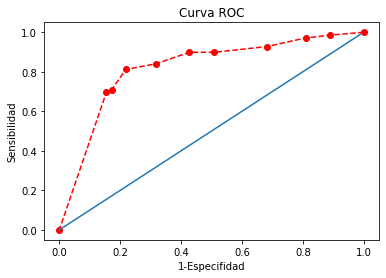

In [133]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

## Aplicaremos  Normalización y Estandarización Para comparar los resultados si preprocesamos los datos

### Normalización

In [10]:
from sklearn.preprocessing import MinMaxScaler

# fit de datos normalizados
norm = MinMaxScaler().fit(X_train)

# transform Data de entrenamiento
X_train_norm = norm.transform(X_train)

# transform Data Testing
X_test_norm = norm.transform(X_test)

**Volvemos aplicar una regresion logistica para la comparación en este caso con datos normalizados**

In [14]:
reglogit_model = linear_model.LogisticRegression()
reglogit_model.fit(X_train_norm,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(f"Presisión de la predicción %.2f"%(reglogit_model.score(X_train_norm,Y_train)*100),"%")

Presisión de la predicción 61.38 %


**Vemos que la presisión de la predicción con datos normalizados bajo esto se debe a que los datos se distribuyen como una campana de Gauss**

## Estandarización

In [16]:
from sklearn.preprocessing import StandardScaler
# Fit de datos estandarizados
scale = StandardScaler().fit(X_train)
# Transformamos data de Entrenamiento
X_train_stand = scale.transform(X_train)
# Transformamos data de testing
X_test_stand = scale.transform(X_test)

**Aplicamos una regresión Logística de los datos estandarizados**

In [17]:
reglogit_model = linear_model.LogisticRegression()
reglogit_model.fit(X_train_stand,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Como podemos observar Python no nos entrega el warning que dice que debemos preprocesar los datos**

In [20]:
print(f"Presisión de la predicción %.2f"%(reglogit_model.score(X_train_stand,Y_train)*100),"%")

Presisión de la predicción 79.92 %


**Comparando las presiciones de la regresión logística con los datos estandarizados subio hasta casi un 80%**

## Validaremos los datos Estandarizados

In [22]:
probs = reglogit_model.predict_proba(X_test_stand)

In [23]:
prediction = reglogit_model.predict(X_test_stand) # x_test por que es el que estamos validando

In [24]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [25]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"]= np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.035124,0
1,0.233214,0
2,0.140140,0
3,0.073723,0
4,0.088567,0


In [26]:
pd.crosstab(prob_df.prediction,columns="count")

col_0,count
prediction,
0,114
1,65


In [27]:
from sklearn import metrics

In [28]:
metrics.accuracy_score(Y_test,prediction)

0.7877094972067039

In [29]:
print(f"Presisión de la predicción score %.2f"%(metrics.accuracy_score(Y_test,prediction)*100),"%")

Presisión de la predicción score 78.77 %


## Validación Cruzada predicción datos estandarizados

In [30]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(linear_model.LogisticRegression(), X_test_stand,Y_test,scoring="accuracy",cv=10)

In [34]:
scores

array([0.83333333, 0.94444444, 0.88888889, 0.72222222, 0.66666667,
       0.77777778, 0.88888889, 0.83333333, 0.83333333, 0.64705882])

In [37]:
pscores=scores.mean()

In [44]:
print(f"Presisión de la predicción crossvalidation score %.2f"%(float(pscores)*100),"%")

Presisión de la predicción crossvalidation score 80.36 %


## Matriz de confusión Y Curva ROC

In [45]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.5
prob_df["prediction"] = np.where(prob_df[0]>=threshold,1,0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.035124,0,0
1,0.233214,0,0
2,0.140140,0,0
3,0.073723,0,0
4,0.088567,0,1


**Matriz de confusión**

In [46]:
confusion_matrix =pd.crosstab(prob_df.prediction,prob_df.actual)

In [47]:
TN=confusion_matrix[0][0] #Verdadero negativo
TP=confusion_matrix[1][1] #verdadero positivo
FN=confusion_matrix[0][1] #falso negativo
FP=confusion_matrix[1][0] #falso positivo

**Sensibilidad y Especifidad**

In [48]:
sens = TP/(TP+FN) #cociente entre true positive dividido true positive + falso negativo
sens

0.7230769230769231

In [49]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.17543859649122806

In [56]:
thresholds = [0.10, 0.12, 0.15, 0.18, 0.20, 0.2, 0.3, 0.4, 0.5]
sensitivities = [1] # arreglo para guardar las sensibilidades
especifities_1 = [1] # arreglo para guardar las especifidades

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
   
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

Text(0.5, 1.0, 'Curva ROC')

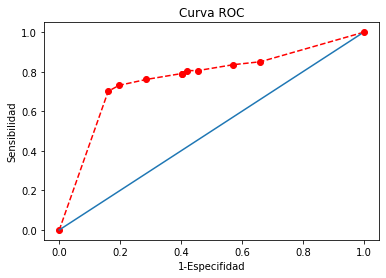

In [57]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

## Modelo Random Forest Clasifier 

**Importamos libreria**

In [58]:
from sklearn.ensemble import RandomForestClassifier

**Aplicamos modelo**

In [61]:
randfor= RandomForestClassifier()
randfor.fit(X_train_stand,Y_train)
pred_rf= randfor.predict(X_test_stand)


**Score usando los datos estandarizados**

In [62]:
randfor.score(X_train_stand,Y_train)

0.9985955056179775

In [63]:
print(f"Presisión de la predicción %.2f"%(randfor.score(X_train_stand,Y_train)*100),"%")

Presisión de la predicción 99.86 %


### Validación Cruzada de modelo Random Forest

In [65]:
scores = cross_val_score(RandomForestClassifier(), X_test_stand,Y_test,scoring="accuracy",cv=10)

In [66]:
scores

array([0.77777778, 0.94444444, 0.83333333, 0.83333333, 0.72222222,
       0.77777778, 0.77777778, 0.88888889, 0.94444444, 0.64705882])

In [67]:
scores.mean()

0.8147058823529412

In [68]:
pscores=scores.mean()

In [69]:
print(f"Presisión de la predicción crossvalidation score %.2f"%(float(pscores)*100),"%")

Presisión de la predicción crossvalidation score 81.47 %


## Curva Roc

In [70]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

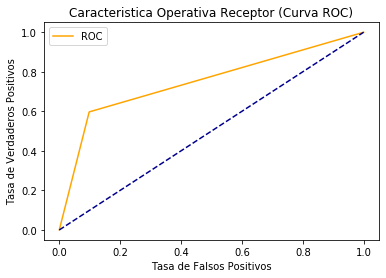

In [73]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_rf) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

**Matriz de confusión**

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, pred_rf)
print(cm)

[[101  11]
 [ 27  40]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       112
           1       0.78      0.60      0.68        67

    accuracy                           0.79       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.79      0.78       179



## Modelo K neighbors 

**Aplicamos modelo**

In [77]:
kn = KNeighborsClassifier()
kn.fit(X_train_stand, Y_train) 
pred_kn = kn.predict(X_test_stand)

In [79]:
kn.score(X_train_stand,Y_train)

0.8651685393258427

**Score K neighbors datos estandarizados**

In [80]:
print(f"Presisión de la predicción %.2f"%(kn.score(X_train_stand,Y_train)*100),"%")

Presisión de la predicción 86.52 %


### Validación Cruzada

In [81]:
scores = cross_val_score(KNeighborsClassifier(), X_test_stand,Y_test,scoring="accuracy",cv=10)

In [82]:
scores

array([0.83333333, 0.94444444, 0.77777778, 0.77777778, 0.55555556,
       0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.64705882])

In [83]:
scores.mean()

0.7869281045751634

In [84]:
pscores=scores.mean()

In [85]:
print(f"Presisión de la predicción crossvalidation score %.2f"%(float(pscores)*100),"%")

Presisión de la predicción crossvalidation score 78.69 %


## Curva ROC Kneighbors

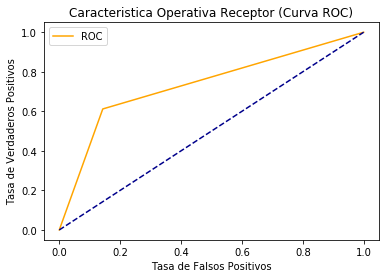

In [86]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_kn) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

**Matriz de Confusíon**

In [88]:
confusion_matrix(Y_test, pred_kn)

array([[96, 16],
       [26, 41]], dtype=int64)

In [89]:
print(classification_report(Y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       112
           1       0.72      0.61      0.66        67

    accuracy                           0.77       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



## Modelo Support Vector Classification

**Importamos la libreria**

In [91]:
from sklearn.svm import SVC

**Aplicamos modelo en datos estandarizados**

In [92]:
svc = SVC()
svc.fit(X_train_stand,Y_train)
y_pred = svc.predict(X_test_stand)

**Score del Modelo Support Vector Classification**

In [93]:
svc.score(X_train_stand,Y_train)

0.8455056179775281

In [95]:
print(f"Presisión de la predicción %.2f"%(svc.score(X_train_stand,Y_train)*100),"%")

Presisión de la predicción 84.55 %


## Validación Cruzada SVM

In [96]:
scores = cross_val_score(SVC(), X_test_stand,Y_test,scoring="accuracy",cv=10)

In [97]:
scores

array([0.83333333, 0.94444444, 0.88888889, 0.72222222, 0.55555556,
       0.83333333, 0.83333333, 0.77777778, 0.88888889, 0.64705882])

In [98]:
scores.mean()

0.792483660130719

In [99]:
pscores=scores.mean()

In [100]:
print(f"Presisión de la predicción crossvalidation score %.2f"%(float(pscores)*100),"%")

Presisión de la predicción crossvalidation score 79.25 %


## Curva ROC

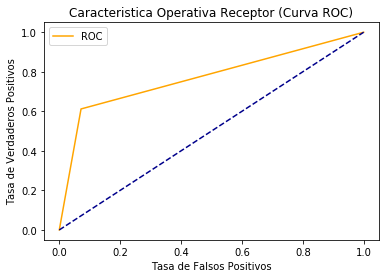

In [101]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred) 
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Caracteristica Operativa Receptor (Curva ROC)')
plt.legend()
plt.show()

**Matriz de confusión**

In [102]:
confusion_matrix(Y_test, y_pred)

array([[104,   8],
       [ 26,  41]], dtype=int64)

In [104]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       112
           1       0.84      0.61      0.71        67

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.81      0.80       179



# Resumen

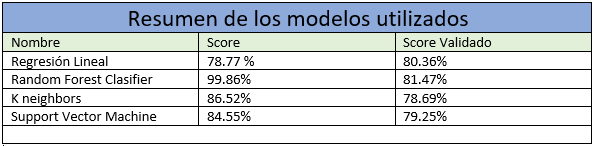

In [107]:
from IPython.display import Image
Image(filename="D:/Prueba/resumen.png")

## Luego de la validación los modelos más efectivos seria la regresión lineal y el Random Forest Clasifier